
#### **Relación entre SVD Delgada y SVD Truncada**

Ambas técnicas están diseñadas para reducir la dimensión de los datos originales, pero lo hacen en diferentes grados:

1. **SVD Delgada**:
   - Mantiene todos los componentes significativos (hasta el rango $r$) y proporciona una representación compacta que aún preserva toda la información relevante de los datos.
   - Es útil cuando queremos una representación más económica sin perder ninguna dimensión significativa.

2. **SVD Truncada**:
   - Va un paso más allá al eliminar incluso algunos componentes significativos si se considera que no son necesarios para la aplicación específica. Se enfoca en conservar solo los $k$ valores singulares más grandes, donde $k$ es un número que decidimos en función de la cantidad de información que queremos preservar.
   - Es extremadamente útil en situaciones donde se necesita una representación aún más compacta, como en la compresión de datos o en la construcción de modelos de aprendizaje automático que deben ser rápidos y eficientes.



**Ejemplo**

Supongamos que tienes un conjunto de imágenes de rostros de 100x100 píxeles (10,000 dimensiones). Aplicando:

- **SVD Delgada**: Si el rango $r$ de la matriz de imágenes es 100, la SVD delgada mantendría 100 componentes, proporcionando una reconstrucción fiel pero con una reducción en el almacenamiento (de 10,000 dimensiones a 100 dimensiones).

- **SVD Truncada**: Si decides truncar la SVD a los primeros 50 valores singulares, reducirías aún más las dimensiones a 50, pero perderías algunas características más sutiles de la imagen, aunque podrías comprimirla significativamente .

### Ejemplo: Rostros de Olivetti.

Aplicar SVD a un conjunto de imágenes permite identificar los patrones principales en las caras (como la forma general de la cara, posición de los ojos, etc.), y reducir la dimensión de la imagen original. 

Al utilizar solo los componentes principales, se puede lograr una representación compacta que sigue siendo altamente efectiva para tareas como la clasificación o identificación de rostros, mientras se ignoran detalles irrelevantes.

In [1]:
# Librerias
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Cargar datos
oliveti_dataset = fetch_olivetti_faces(data_home="data")

In [2]:
oliveti_dataset.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and\nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position\n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n=================   ==================

In [3]:
oliveti_dataset.images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [4]:
n_samples, h, w = oliveti_dataset.images.shape

In [5]:
#Aplasto los datos para poder trabajar "mas intuitivamente" con las matrices
X = oliveti_dataset.data
X = pd.DataFrame(X)

y = oliveti_dataset.target
y = pd.DataFrame(y, columns=['pid']) # pid is person_id

df = y.join(X)
df.head()

,pid,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


In [6]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


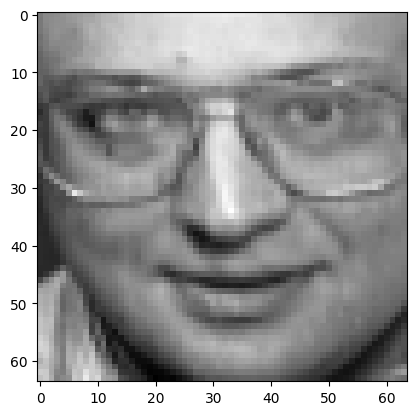

In [7]:
# Choose a figure to plot
img1=X.iloc[300].to_numpy().reshape(h,w)
plt.imshow(img1, cmap=plt.cm.gray)

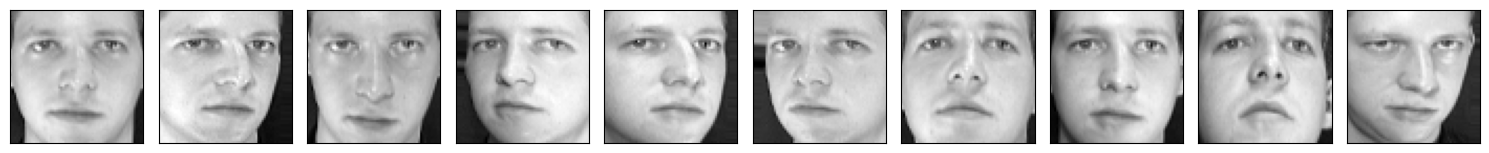

In [8]:
faces_tplot=df.drop(columns=['pid'])
n_row=1
n_col=10

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(faces_tplot.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

#### 3.1. Rostro promedio. 

 Encuentre el rostro promedio, para ello calcule la media por columnas o la media por píxel y grafíquelo.

- El objetivo es  encontrar las características que hacen que los individuos sean diferentes a los demás. 

-  La razón por la que esto es necesario es porque queremos crear un sistema que pueda representar cualquier rostro. 

- Por lo tanto, calculamos los elementos que todas las caras tienen en común (la media). 

- Si extraemos esta media de las imagen, se aprecian las características que distinguen cada fotografía del resto del conjunto. Maximizamos la varianza!

In [9]:
# Utilice este espacio para escribir el código.
Xmean = df.drop(columns=[ 'pid']).mean(axis=0)

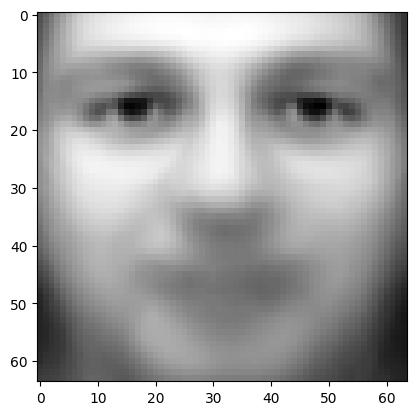

In [10]:
#plot the average face 
plt.imshow(Xmean.to_numpy().reshape((h, w)), cmap=plt.cm.gray)

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes substraigale el rostro promedio.

In [11]:

Demean=df.drop(columns=['pid'])-Xmean 

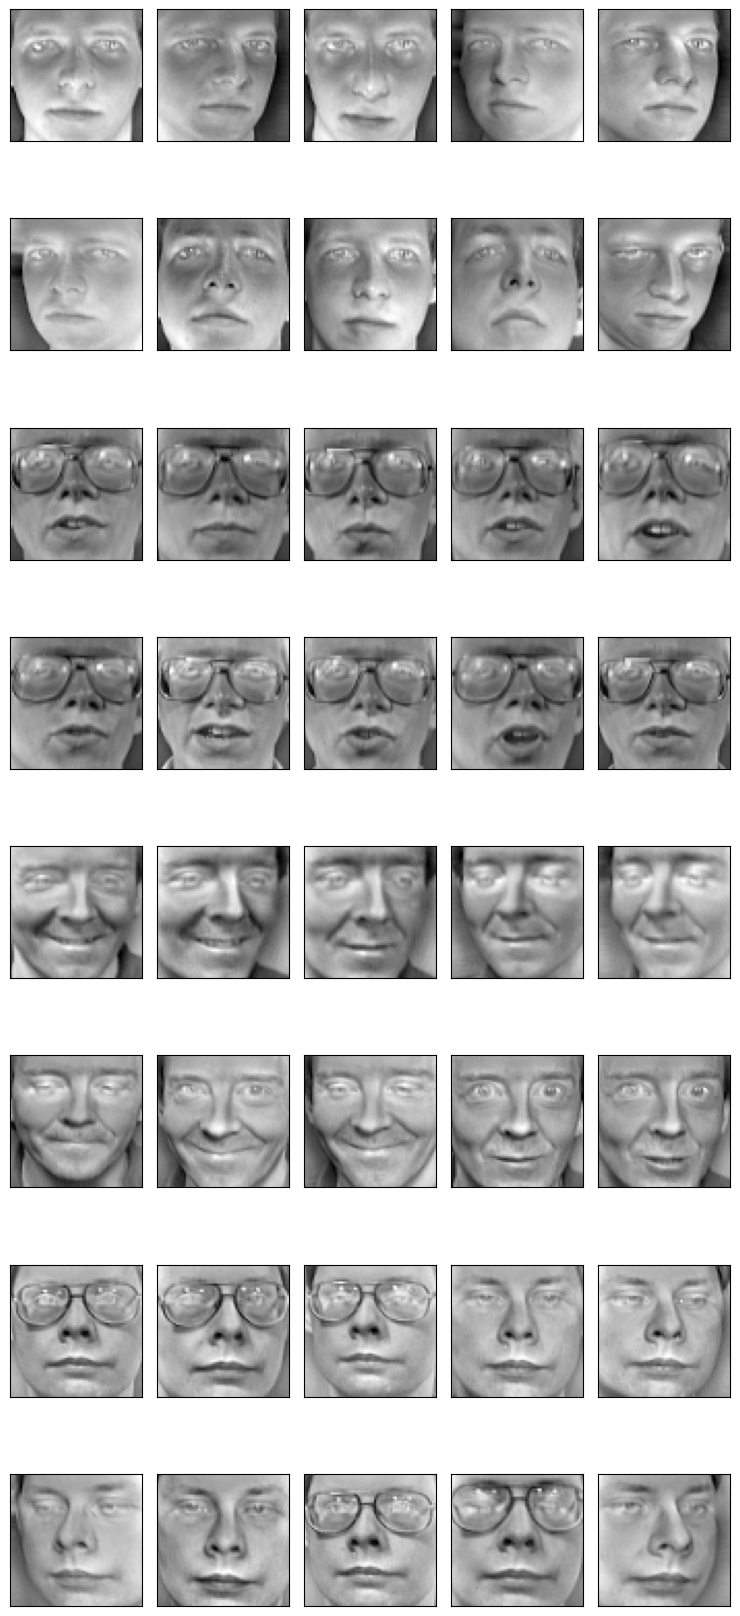

In [12]:
#Some examples
n_row=8
n_col=5

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(Demean.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K$ eigen vectores que mejor representen las imágenes. Justifique su elección.

In [13]:
from scipy.linalg import svd #pueden explorar con sklearn
U,S,Vt = svd(X)

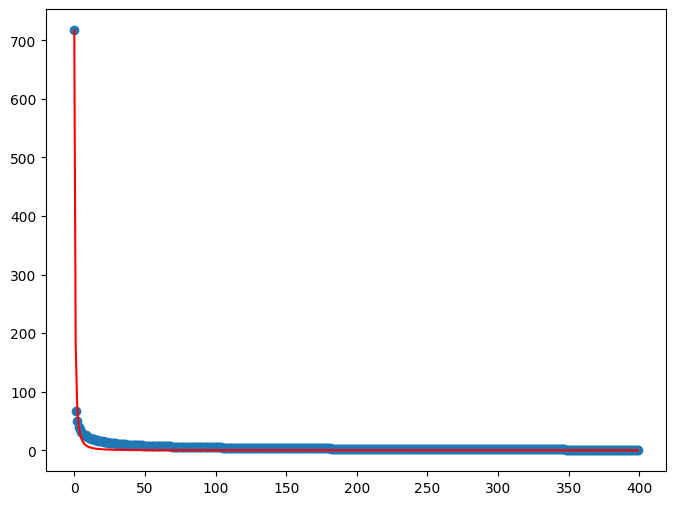

In [14]:
# observe cuan rapidamente caen los SVD
idx = range(len(S))
func = [S[0]/((i+1) ** 2) for i in idx ]

plt.figure(figsize = (8, 6))
plt.plot(idx, func, color = 'r')
plt.scatter(idx, S)

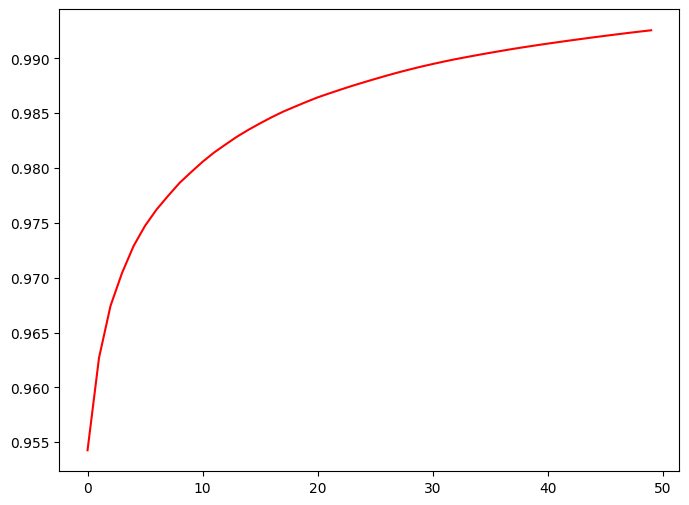

In [16]:
rg =50
idx = range(0,rg)
var_explained = np.round(S**2/np.sum(S**2), decimals=6)

cumsum=var_explained[0:rg].cumsum()

plt.figure(figsize = (8, 6))
plt.plot(idx,cumsum , color = 'r')


In [17]:
sum(var_explained[0:rg])

np.float32(0.9925629)

In [18]:
n,k=X .shape

S2= np.resize(S,[n,1])*np.eye(n,k) #ponemos los valores singulares en una matriz diagonal

l = 10

reconstructed=np.dot(U[:,0:l],np.dot(S2[0:l,0:l],Vt[0:l,:]))
reconstructed = pd.DataFrame(reconstructed)
reconstructed

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.308737,0.368580,0.420691,0.462882,0.500986,0.565040,0.614439,0.649324,0.676054,0.695942,...,0.445536,0.426627,0.386314,0.342249,0.277421,0.228703,0.224217,0.197258,0.171471,0.179804
1,0.690191,0.735546,0.738542,0.728707,0.710729,0.710068,0.707660,0.714209,0.719311,0.715806,...,0.239384,0.214551,0.178121,0.147537,0.146989,0.143439,0.170882,0.191337,0.206383,0.207230
2,0.346580,0.413287,0.471038,0.509122,0.543811,0.601805,0.645052,0.675947,0.701346,0.718293,...,0.369719,0.343837,0.301274,0.259831,0.193035,0.146335,0.146909,0.122533,0.103419,0.118011
3,0.104494,0.092250,0.086460,0.108019,0.147826,0.202619,0.272621,0.356013,0.418348,0.472471,...,0.617379,0.638717,0.640917,0.644304,0.644392,0.651167,0.648333,0.614193,0.567764,0.536493
4,0.514830,0.562070,0.586468,0.600308,0.604295,0.623368,0.647310,0.684304,0.711842,0.726043,...,0.236883,0.215066,0.182483,0.155394,0.145115,0.134089,0.127977,0.133810,0.134746,0.135509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.421452,0.484431,0.542570,0.581676,0.620740,0.641029,0.663460,0.678503,0.689759,0.692014,...,0.279506,0.295235,0.311584,0.325178,0.298510,0.292139,0.280032,0.263024,0.247062,0.262445
396,0.281419,0.297525,0.311906,0.340878,0.369435,0.404733,0.461132,0.533880,0.582137,0.619444,...,0.500103,0.525360,0.539557,0.550778,0.557449,0.564678,0.530059,0.503469,0.463553,0.443828
397,0.518646,0.582654,0.629869,0.655409,0.675025,0.669894,0.679462,0.695585,0.704239,0.701926,...,0.208856,0.226400,0.251785,0.275092,0.269865,0.275526,0.247905,0.241068,0.229212,0.240346
398,0.171490,0.187368,0.204704,0.231239,0.264437,0.302515,0.361594,0.439626,0.494103,0.536966,...,0.587671,0.626103,0.639203,0.652318,0.640338,0.640031,0.603622,0.566294,0.518269,0.489752


In [19]:
imag10_index=df.loc[df['pid'] == 10].index
imag10=reconstructed.iloc[imag10_index]

imag10

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
100,0.387331,0.461496,0.578533,0.675950,0.740158,0.785809,0.822283,0.840037,0.845662,0.846211,...,0.323881,0.329300,0.317560,0.297594,0.238036,0.207332,0.150979,0.122695,0.121014,0.122265
101,0.426330,0.484799,0.583479,0.679164,0.743694,0.788092,0.824336,0.838835,0.841298,0.842703,...,0.331041,0.324582,0.312948,0.287416,0.248222,0.225632,0.180296,0.161877,0.162953,0.160314
102,0.418259,0.475277,0.572461,0.667906,0.732324,0.782270,0.822605,0.840372,0.845273,0.848252,...,0.349177,0.347013,0.336084,0.311958,0.273181,0.251268,0.208431,0.187806,0.186670,0.185685
103,0.394158,0.458997,0.565363,0.658748,0.718561,0.763930,0.794270,0.803490,0.803867,0.802265,...,0.361747,0.359832,0.331311,0.293421,0.232058,0.196729,0.153462,0.133725,0.141184,0.132391
104,0.582889,0.640141,0.697148,0.754596,0.789064,0.804410,0.809954,0.796465,0.781000,0.767915,...,0.335400,0.316756,0.290975,0.247620,0.219634,0.194264,0.179319,0.188382,0.200633,0.192299
105,0.456056,0.521392,0.621036,0.713373,0.772817,0.814600,0.846958,0.857753,0.857616,0.855902,...,0.302711,0.290778,0.273826,0.243314,0.200257,0.172812,0.127420,0.111883,0.115219,0.116106
106,0.496605,0.573185,0.676945,0.762267,0.812631,0.837532,0.851653,0.847090,0.836419,0.824565,...,0.304577,0.296717,0.271668,0.234073,0.177367,0.141630,0.093856,0.084557,0.096661,0.090340
107,0.590620,0.663430,0.744999,0.811633,0.848759,0.854176,0.852744,0.835119,0.814358,0.795319,...,0.337405,0.331382,0.313021,0.278894,0.235637,0.207027,0.171070,0.171379,0.184067,0.172528
108,0.507232,0.566681,0.651504,0.724263,0.767123,0.793136,0.806003,0.801478,0.791478,0.783016,...,0.386488,0.377392,0.345175,0.303514,0.252529,0.223074,0.196983,0.187864,0.201616,0.185127
109,0.404241,0.475231,0.587863,0.686042,0.748963,0.796409,0.830606,0.842990,0.845541,0.844163,...,0.282354,0.274583,0.251054,0.217635,0.161028,0.127180,0.077749,0.059033,0.065775,0.067836


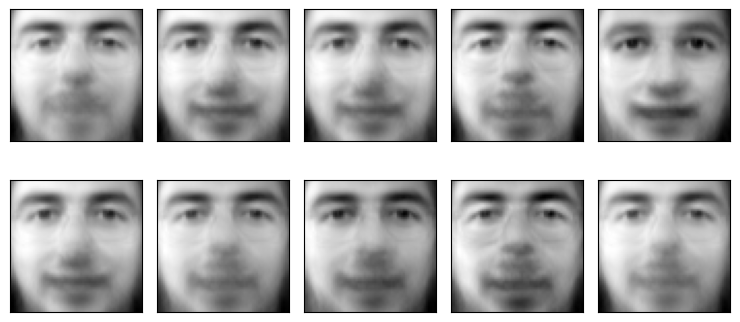

In [20]:
# Graficamos
n_row=2
n_col=5

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(imag10.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

# Información de Sesión

In [23]:
import session_info

session_info.show(html=False)

-----
matplotlib          3.10.5
numpy               2.2.6
pandas              2.3.1
scipy               1.15.3
session_info        v1.0.1
sklearn             1.7.1
-----
IPython             8.24.0
jupyter_client      8.6.1
jupyter_core        5.7.2
-----
Python 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
Windows-10-10.0.26100-SP0
-----
Session information updated at 2025-08-17 19:52
